# Checkpoint 1

Se instala el paquete de seaborn

In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.1 MB/s eta 0:00:000:00:01


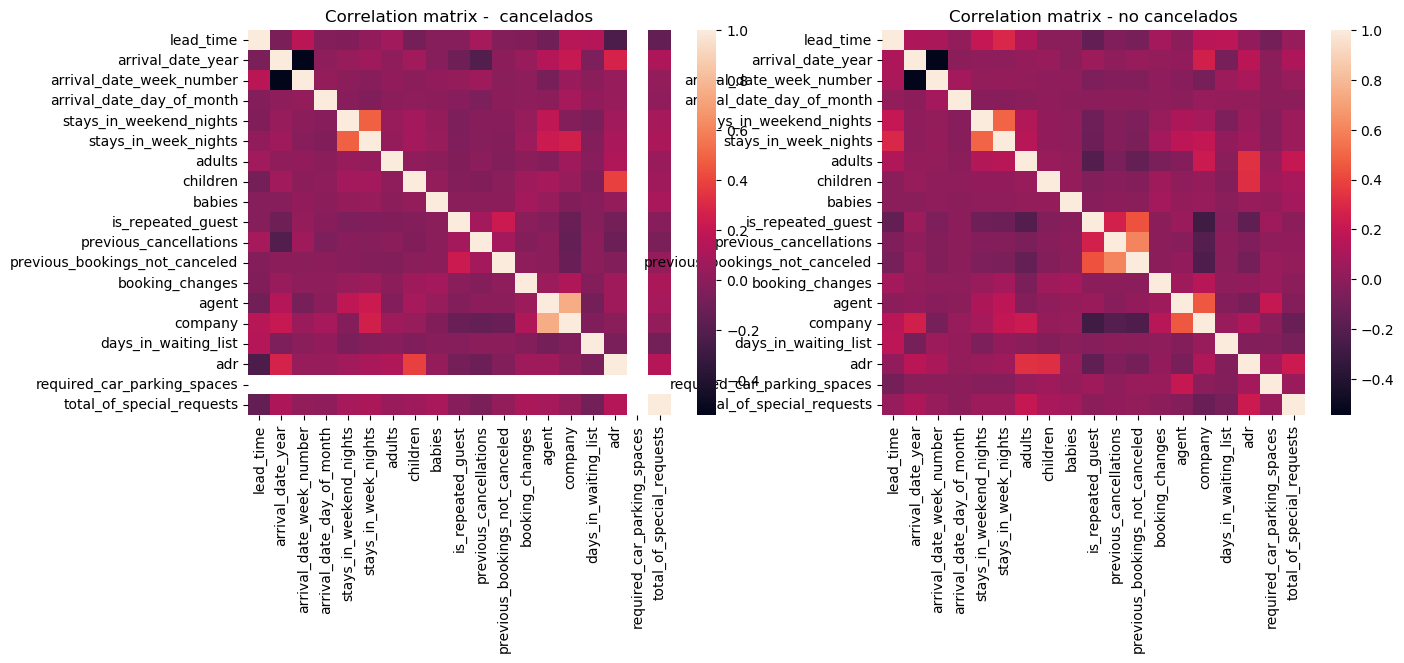

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df  = pd.read_csv("./dataset/hotels_train.csv")
df = df.drop(columns=['reservation_status_date'])
df_cancelado = df[df.is_canceled == 1]
df_no_cancelado = df[df.is_canceled == 0]

corr_can = df_cancelado.drop("is_canceled", axis=1).corr(numeric_only=True)
corr_no_can = df_no_cancelado.drop("is_canceled", axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.heatmap(corr_can, 
            annot=False,
            ax=ax[0])
ax[0].set_title('Correlation matrix -  cancelados')

sns.heatmap(corr_no_can, 
            annot=False,
            ax=ax[1])
ax[1].set_title('Correlation matrix - no cancelados')

plt.show()

Se obtienen los posibles valores que toman las variables cualitativas para realizar el analisis de estas en la exploración inicial.

In [4]:
print(df['meal'].value_counts(), '\n')
print(df['country'].value_counts(), '\n')
print(df['market_segment'].value_counts(), '\n')
print(df['distribution_channel'].value_counts(), '\n')
print(df['reserved_room_type'].value_counts(), '\n')
print(df['assigned_room_type'].value_counts(), '\n')

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64 

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64 

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64 

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64 

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64 

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64 



Se obtienen las medidas de resumen de las variables cuantitativas para realizar el analisis de estas en la exploración inicial. En particular nos interesa la moda, la media y la mediana.

In [5]:
print(df['is_repeated_guest'].describe())
print("moda", df['is_repeated_guest'].mode()[0], '\n')
print(df['previous_cancellations'].describe())
print("moda", df['previous_cancellations'].mode()[0], '\n')
print(df['previous_bookings_not_canceled'].describe())
print("moda", df['previous_bookings_not_canceled'].mode()[0], '\n')
print(df['booking_changes'].describe())
print("moda", df['booking_changes'].mode()[0])

count    61913.000000
mean         0.027991
std          0.164948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64
moda 0 

count    61913.000000
mean         0.114790
std          0.993723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64
moda 0 

count    61913.000000
mean         0.115420
std          1.396359
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: previous_bookings_not_canceled, dtype: float64
moda 0 

count    61913.000000
mean         0.195952
std          0.610519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64
moda 0


In [ ]:
## Exploración inicial
### Variables

12. **meal:** Esta variable es de tipo alfanumérica y contendrá (en forma de acrónimo) el tipo de servicio de comida correspondiente a la reserva. Los posibles valores que puede tomar son:
  - Undefined: No se reservó servicio de comida. Aparece en 591 (0.95%) de los registros.
  - SC: Tiene el mismo significado que Undefined. Aparece en 5556 (8.97%) de los registros.
  - BB: Sólo desayuno. Aparece en 47837 (77.26%) de los registros.
  - HB: Desayuno y otra comida (generalmente cena). Aparece en 5556 (8.97%) de los registros.
  - FB: Desayuno, almuerzo y cena. Aparece en 477 (0.77%) de los registros

13. **country:** Esta variable es también de tipo alfanumérica en la que se representa mediante el código ALPHA-3 el nombre de un país. Como posibles valores, tenemos 149 códigos en todos los registros, siendo Portugal (PRT) el más frecuente con 27950 apariciones y algunos paises como Fiji (FJI), Liechstein (LIE), Antartida (ATA) y Ruanda (RWA) los que solo aparecen en una.

14. **market_segment:** Designación del cliente en cuanto a la segmentación de mercado (una segmentación que divide a los clientes en grupos más pequeños los cuales comparten caracteristicas similares). Puede tomar los siguientes valores:
  - TA/TO: Agentes de viaje u operadores de turismo. Aparece en 51849 (83.74%) registros.
  - Direct: Directa. Aparece en 6799 (10.98%) registros.
  - Corporate: Reservas realizadas por empresas. Aparece en 3172 (5.12%) registros.
  - GDS: Clientes que provienen de la aviación. Aparece en 89 (0.14%) registros.
  - Undefined: No se completaron los datos. Aparece en 4 (0.006%) registros.

15. **distribution_channel:** Nos indica el canal de la distribución de la reserva (que es un intermediario en linea entre el hotel y el cliente a la hora de reservar). En nuestros registros, toma los siguientes valores:
  - Online TA: Agente de viajes en linea. Aparece en 29269 (47.26%) registros.
  - Offline TA/TO: Agentes de viaje u operadores de turismo los cuales no son por medio de internet. Aparece en 12384 (20%) registros.
  - Groups: Por grupos. Aparece en 11545 (18.64%) registros.
  - Direct: Directa. Aparece en 5757 (9.29%) registros.
  - Corporate: Reservas realizadas por empresas. Aparece en 2484 (4.01%) registros.
  - Complementary: Complementarios. Aparece en 359 (0.58%) registros.
  - Aviation: Clientes que provienen de la aviación. Aparece en 113 (0.18%) registros.
  - Undefined: No se completaron los datos. Aparece en 2 (0.003%) registros.

16. **is_repeated_guest:** Esta variable de tipo booleana nos dice si la reserva fue hecha anteriormente por un invitado repetido (en este caso toma el valor 1) o no (toma el valor 0). Si un perfil está asociado al cliente y si la fecha de creación del perfil de este para la reserva coinciden, se asume que es un invitado repetido.
  - *Moda:* 0
  - *Media:* 0.028
  - *Mediana:* 0

17. **previous_cancellations:** Esta variable de tipo entero nos da información sobre la cantidad de veces en las que el cliente solicitando la reserva canceló en reservas anteriores (en el caso que no haya un perfil de cliente asociado a la reserva, este valor será 0). 
  - *Moda:* 0
  - *Media:* 0.1148
  - *Mediana:* 0

18. **previous_bookings_not_canceled:** Esta variable de tipo entero nos da información sobre la cantidad de veces en las que el cliente solicitando la reserva no canceló en reservas anteriores. Podriamos afirmar que sumando la variable anterior y esta, podemos obtener cuántas reservas previas hizo el cliente, siempre y cuando los datos estén completos.
  - *Moda:* 0
  - *Media:* 0.1154
  - *Mediana:* 0

19. **reserved_room_type:** Representa el código de habitación que el cliente solicitó al realizar la reserva. Se presenta el código en vez de la designación por razones de anonimidad. Puede tomar los siguientes valores:
  - A: 45134 (72.9%)
  - D: 9585 (15.48%)
  - E: 3249 (5.25%)
  - F: 1451 (2.34%)
  - G: 1090 (1.76%)
  - B: 580 (0.94%)
  - C: 482 (0.78%)
  - H: 334 (0.54%)
  - P: 7 (0.011%)
  - L: 1 (0.001%)

20. **assigned_room_type:** En esta variable vemos el código de habitación que se le asigno a la reserva, el cual puede diferir del originalmente solicitado por varias cuestiones operativas del hotel o bien por petición del cliente. Se muestra el código por las mismas razones que en la variable anterior. Toma los siguientes valores:
  - A: 40007 (64.62%)
  - D: 12190 (19.69%)
  - E: 3779 (6.10%)
  - F: 1821 (2.94%)
  - G: 1277 (2.06%)
  - C: 1127 (1.82%)
  - B: 1056 (1.71%)
  - H: 384 (0.62%)
  - I: 145 (0.23%)
  - K: 119 (0.19%)
  - P: 7 (0.011%)
  - L: 1 (0.001%)

21. **booking_changes:** Esta variable de tipo entero nos da información acerca de la cantidad de cambios o correcciones que se hicieron en la reserva desde el momento de la creación hasta el check-in o la cancelación de la misma. 
  - *Moda:* 0
  - *Media:* 0.196
  - *Mediana:* 0